# 3 Analyse exploratoire des donnees ´
Corentin PRADIE
Lucas TAVANI
Mehdi REMILI
Romain VILLENEUVE
L3C

Cette phase consiste a : `
1. identifier la variable cible qui doit ˆetre pr´edite. Dans ce projet la variable pr´edite est la variation
journali`ere des prix des futures (la colonne TARGET dans les datasets Y train et Y test).
2. effectuer une analyse exploratoire des donn´ees (EDA, Exploratory Data Analysis) par une vari´et´e de
graphiques et de statistiques en suivant les ´etapes suivantes :

— Faire un aperc¸u des variables en examinant leur type, leur distribution, leur plage de valeurs et leur
signification

— Examiner la relation entre les variables caract´eristiques et la variable cible en utilisant des techniques
graphiques telles que des histogrammes, des diagrammes en boˆıte et des graphiques de dispersion

— Construire une matrice de corr´elation entre les variables

— Interpr´eter les r´esultats de l’EDA pour identifier les caract´eristiques importantes qui influencent le
prix de l’´electricit´e et les relations significatives entre les variables

Pour bien maˆıtriser cette phase, je vous invite a consulter le lien suivant : ` Python for Data Science: Implementing
Exploratory Data Analysis (EDA) and K-Means Clustering
https://medium.com/@aziszamcalvin/python-for-data-science-implementing-exploratory-data-analysis-eda-and-k-means-clustering-bcf1d24adc12

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analyse de la Variable Cible
`TARGET` : Variation journalière du prix de futures d'électricité (maturité 24h)

In [2]:
raw_data_x = pd.read_csv("data/Data_X.csv", index_col='ID')
raw_dataNew_x = pd.read_csv("data/DataNew_X.csv", index_col='ID')
raw_data_y = pd.read_csv("data/Data_Y.csv", index_col='ID')

In [3]:
data_xy = pd.merge(raw_data_x, raw_data_y, on='ID').copy().dropna()

<Axes: >

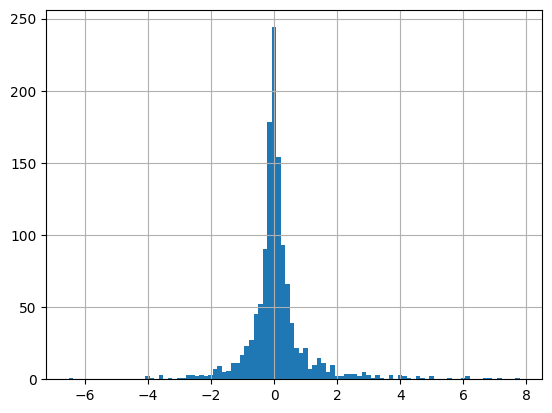

In [4]:
data_xy['TARGET'].hist(bins=100)

In [5]:
data_xy['TARGET'].describe().iloc[[0,1,2,3,7]]

count    1276.000000
mean        0.093677
std         1.071405
min        -6.519268
max         7.786578
Name: TARGET, dtype: float64

Cette histogramme montre la distribution de la des variations journalieres du prix des futures dans nos données.
En effet, c'est une variation sa moyenne est de 0. 
Il y a un ecart moyen avec la moyenne de 1.
Cependant on observe des valeurs extremes allant de dans les negatifs jusqu'a -6,5, et dans les positifs jusqu'a 7,7.

# Analyse Exploratoire des Données

Le but de la partie EDA (Exploratory Data Analysis) en machine learning est d'explorer et d'analyser les données afin de mieux comprendre leur structure, leurs caractéristiques et leurs relations. Cela permet aux scientifiques des données et aux analystes de prendre des décisions éclairées sur les méthodes de prétraitement des données, les techniques d'apprentissage automatique à utiliser, les variables à inclure dans le modèle et les hypothèses à tester.

Plus précisément, l'EDA comprend des tâches telles que la visualisation des données pour identifier des schémas et des tendances, la recherche de valeurs aberrantes et de données manquantes, la corrélation entre les variables et la compréhension de la distribution des données. Cela aide à déterminer si les données sont appropriées pour l'apprentissage automatique et si des ajustements doivent être apportés pour améliorer la qualité des données et la performance du modèle.

En bref, l'EDA est une étape cruciale dans le processus de modélisation de l'apprentissage automatique car elle permet de mieux comprendre les données sur lesquelles le modèle sera formé, ce qui conduit à une meilleure sélection des caractéristiques, des méthodes de prétraitement de données et des techniques d'apprentissage automatique pour améliorer la qualité du modèle et la performance des prédictions.

# Analyse Univariée 

## Histogrammes

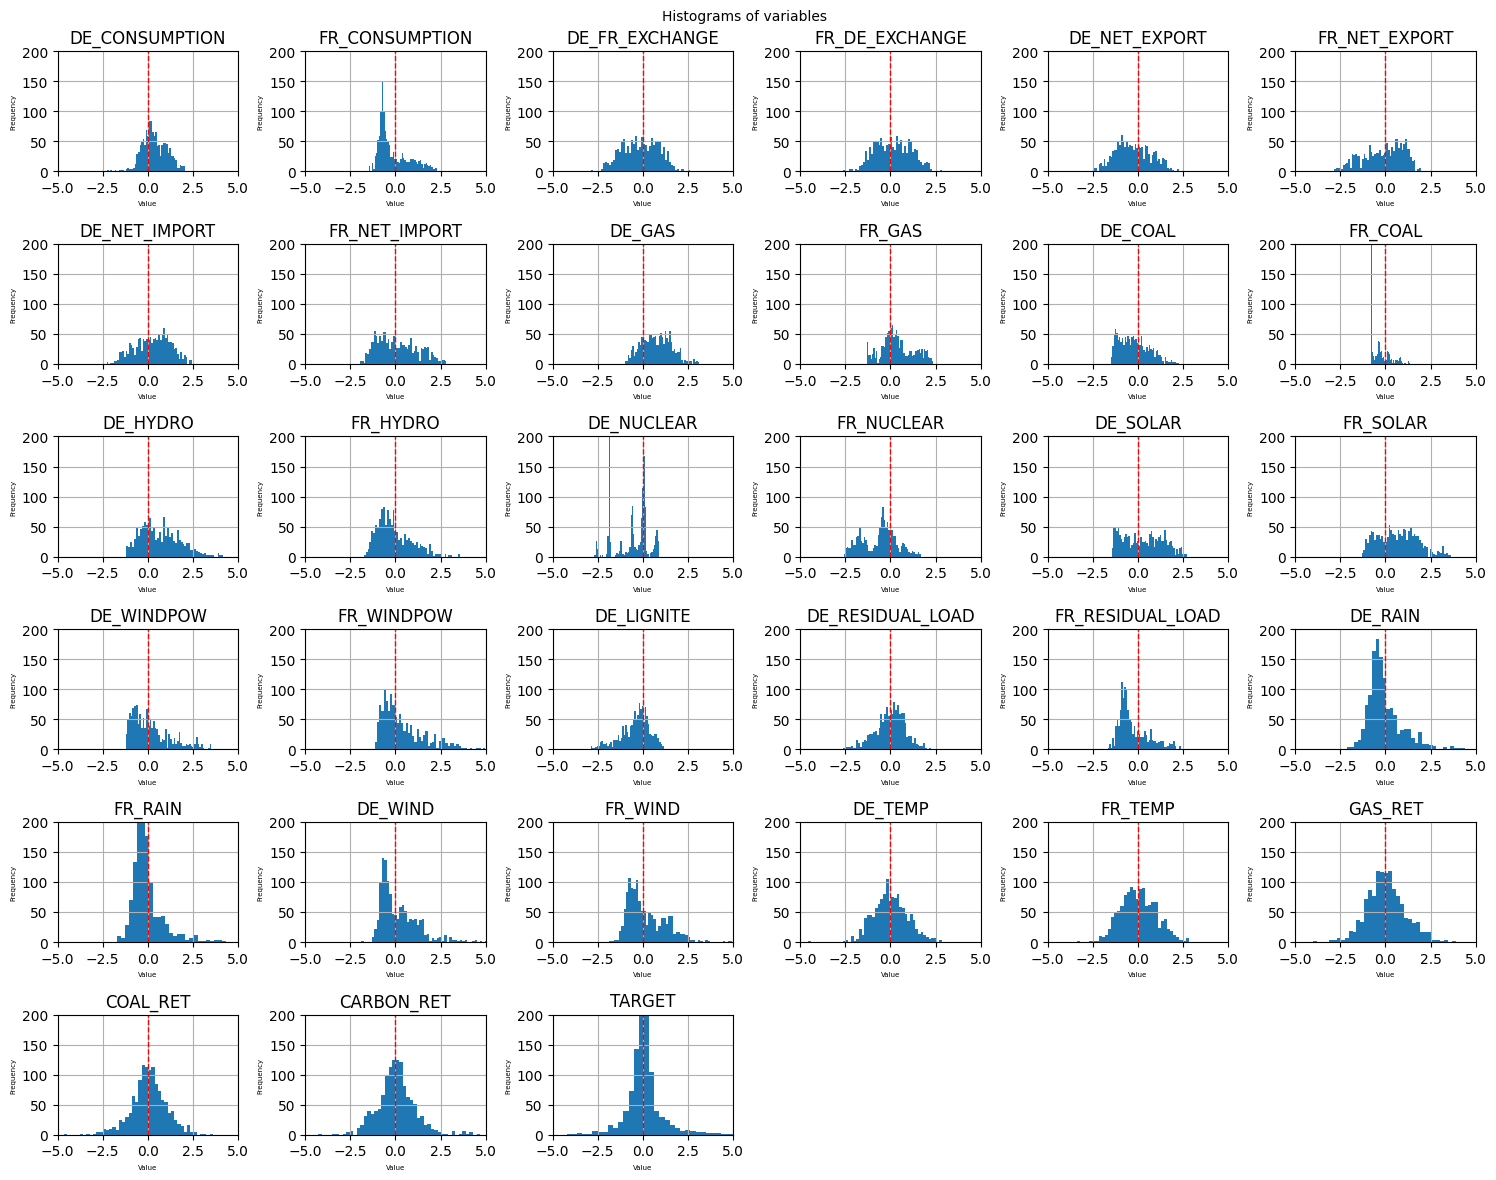

In [6]:
title_fontsize = 10
axes_fontsize = 5
numeric_cols = data_xy.select_dtypes(include=['float']).columns
nrows = 6
ncols = 6
x_lim = 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*2))

for i, column in enumerate(numeric_cols):
    row_idx = i // ncols
    col_idx = i % ncols
    ax = axes[row_idx, col_idx]  
    data_xy[column].hist(bins=50, ax=ax)
    ax.set_title(column)
    ax.set_xlabel("Value", fontsize=axes_fontsize)
    ax.set_ylabel("Frequency", fontsize=axes_fontsize)
    ax.set_ylim([0, 200]) 
    ax.set_xlim([-x_lim, x_lim])
    ax.axvline(x=0, color='r', linestyle='--', linewidth=1) 

# If there are any subplots left over, delete them
if len(numeric_cols) < nrows*ncols:
    for i in range(len(numeric_cols), nrows*ncols):
        fig.delaxes(axes.flatten()[i])  

plt.suptitle("Histograms of variables", fontsize=title_fontsize)
plt.tight_layout()

## Diagrammes moustache

(-4.0, 4.0)

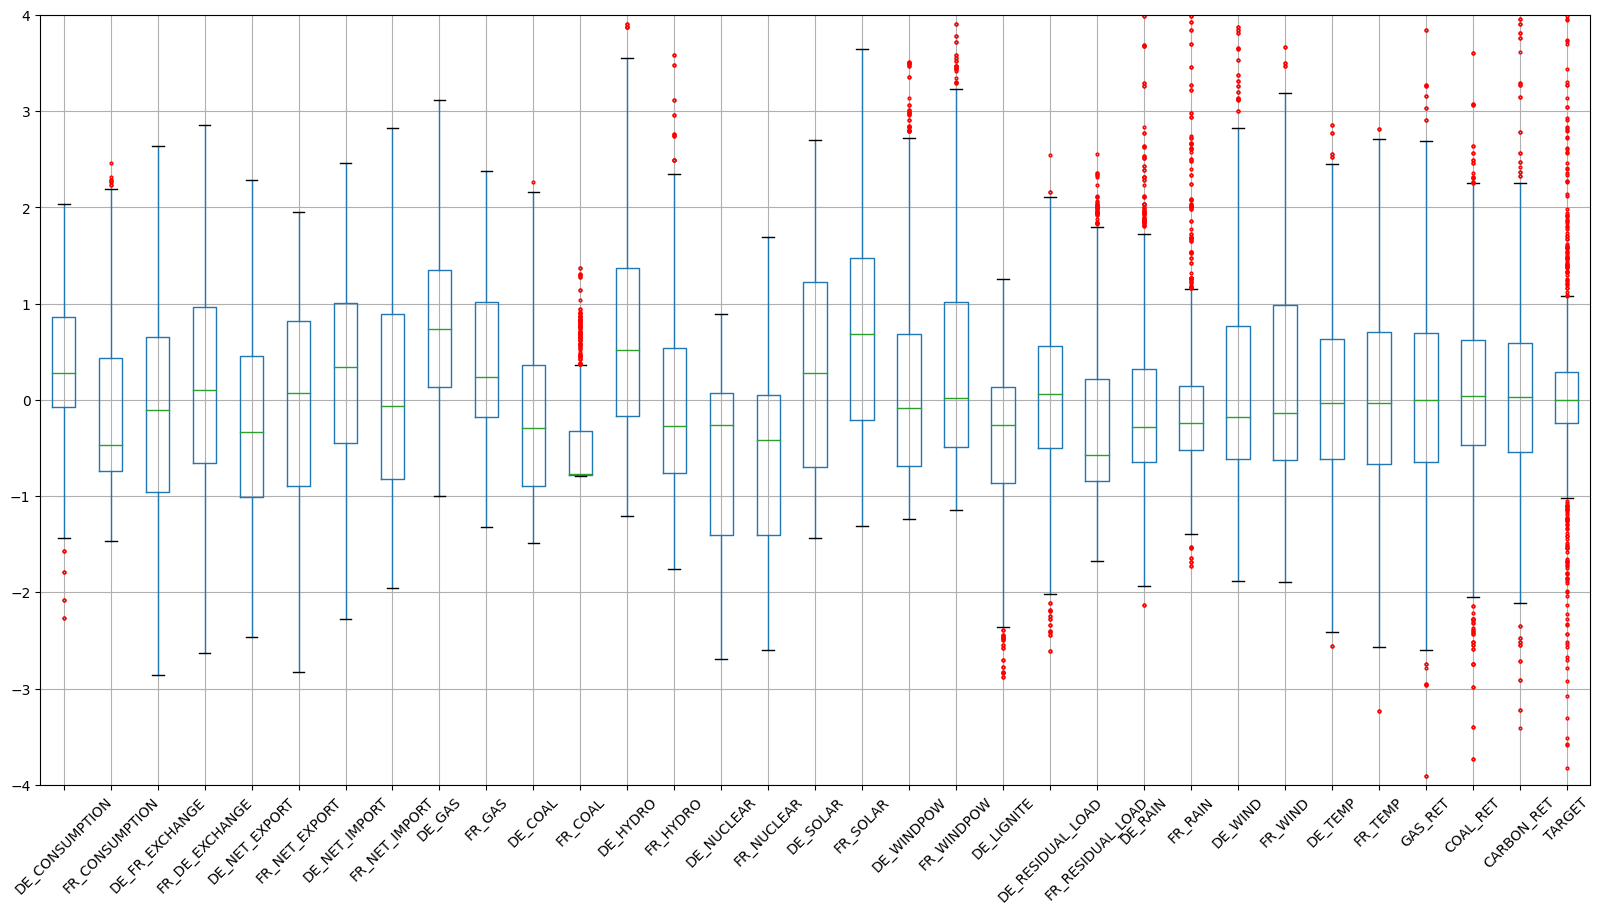

In [7]:
flierprops = {
    'markersize': 2,
    'markeredgecolor': 'r',
}

y_lim = 4

data_xy.boxplot(column=numeric_cols.tolist(), figsize=(20,10), flierprops=flierprops)
plt.xticks(rotation=45, fontsize=10);
plt.ylim([-y_lim, y_lim])

Après cette analyse univariée, nous avons décidé de supprimer les variables qui ont une mauvaise distribution. Nous supprimons donc FR_COAL et DE_NUCLEAR. La suppréssion s'effectuera à la fin du fichier en même temps que l'ajout des nouvelles variables.

# Analyse Bivariée

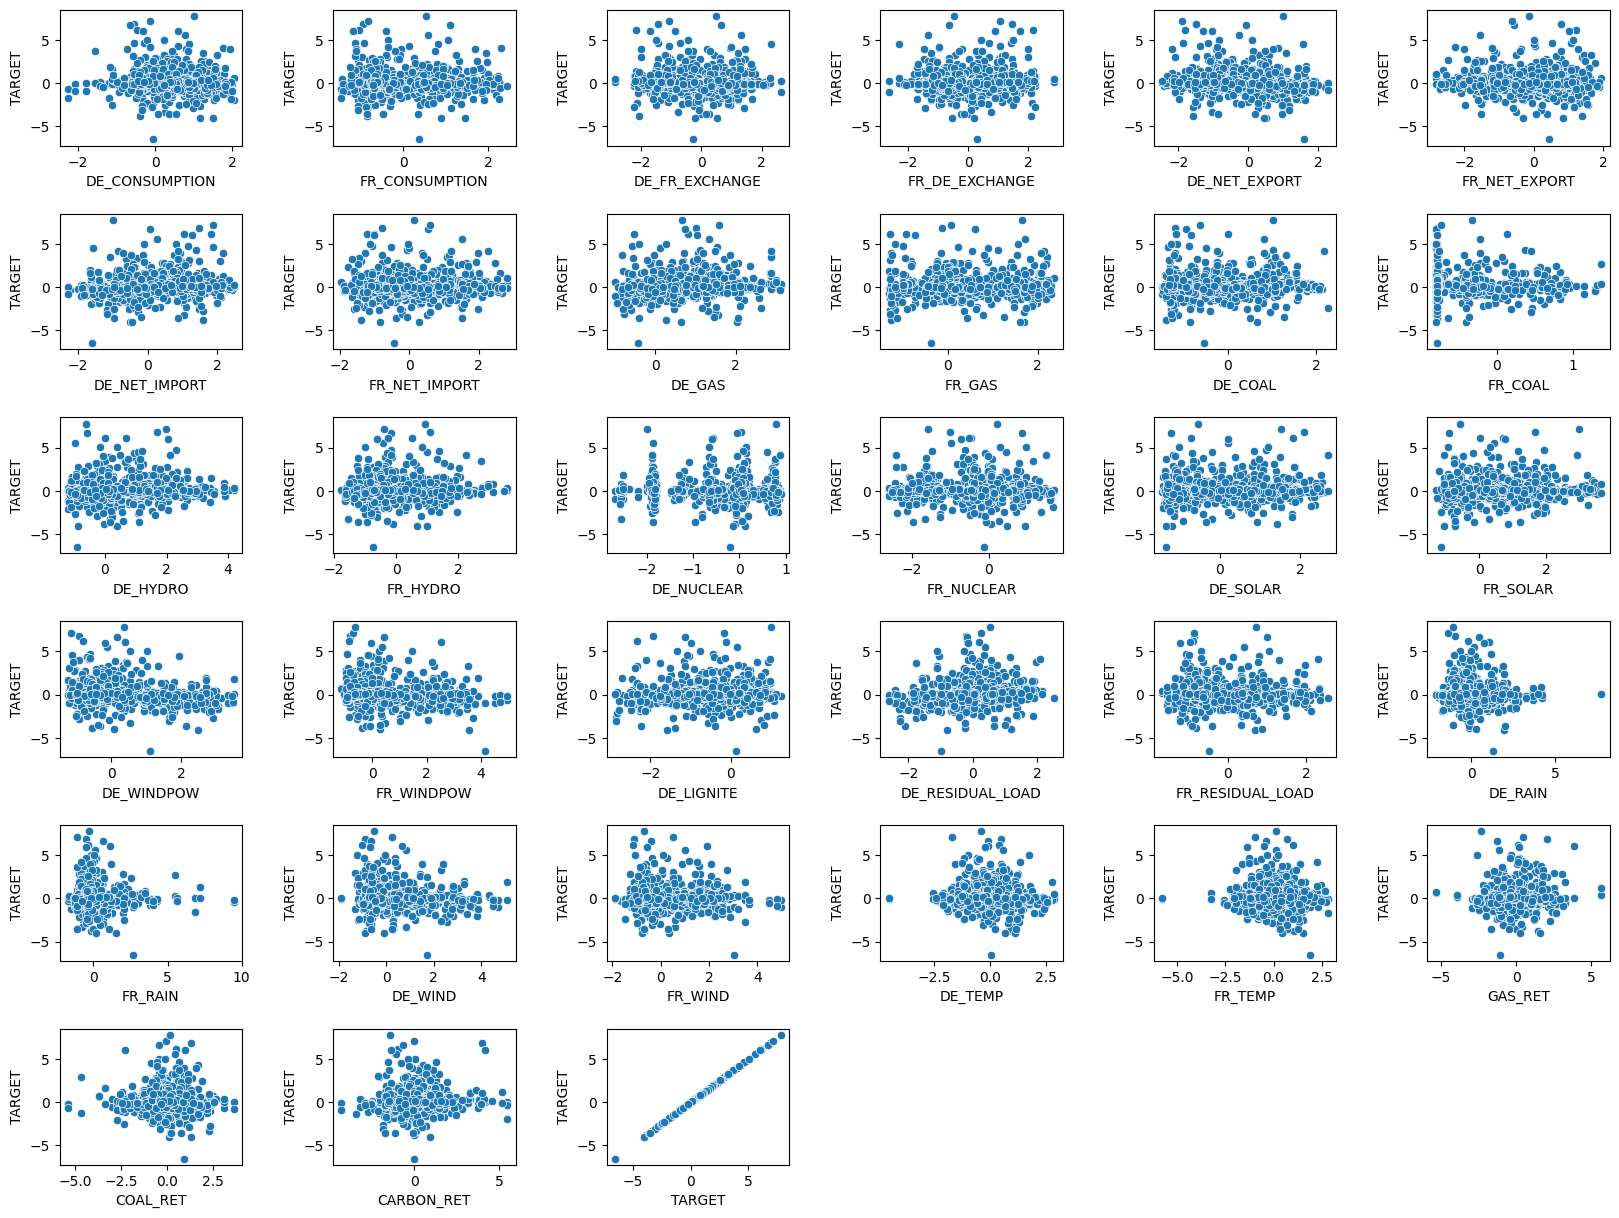

In [8]:
fig,axes = plt.subplots(6,6, figsize=(20,15))

for i, column in enumerate(numeric_cols):
    row_idx = i // ncols
    col_idx = i % ncols
    ax = axes[row_idx, col_idx]
    sns.scatterplot(x=data_xy[column], y=data_xy['TARGET'], ax=ax)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

if len(numeric_cols) < nrows*ncols:
    for i in range(len(numeric_cols), nrows*ncols):
        fig.delaxes(axes.flatten()[i]) 

<Axes: >

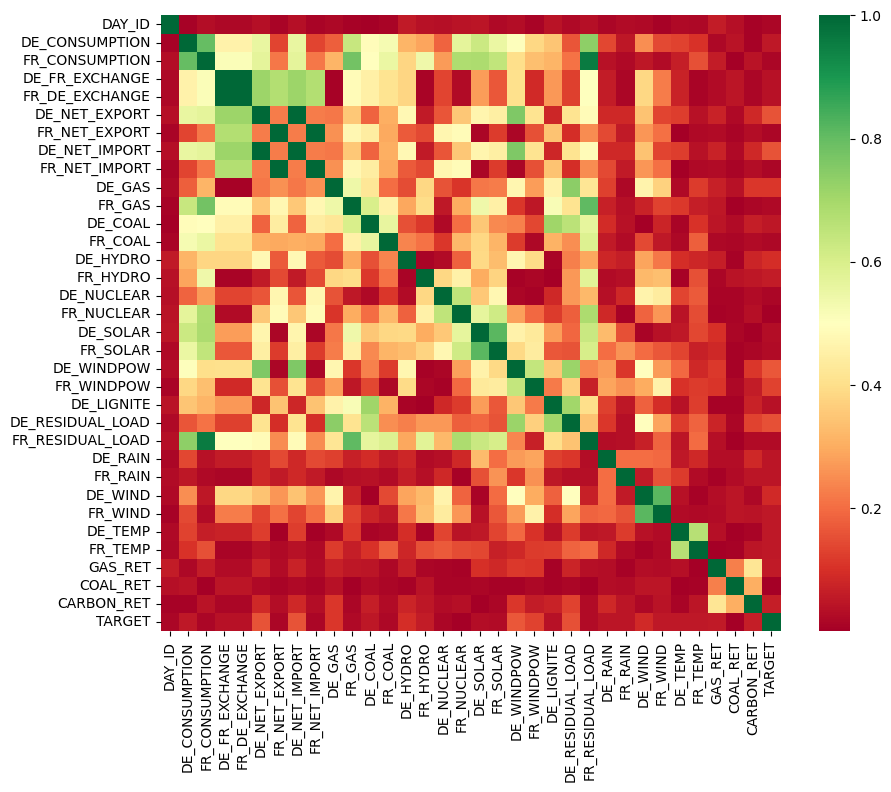

In [9]:
plt.figure(figsize=(10, 8))
temp_data_xy = data_xy.drop('COUNTRY', axis=1)
sns.heatmap(temp_data_xy.corr().abs(), cmap="RdYlGn")

<Axes: >

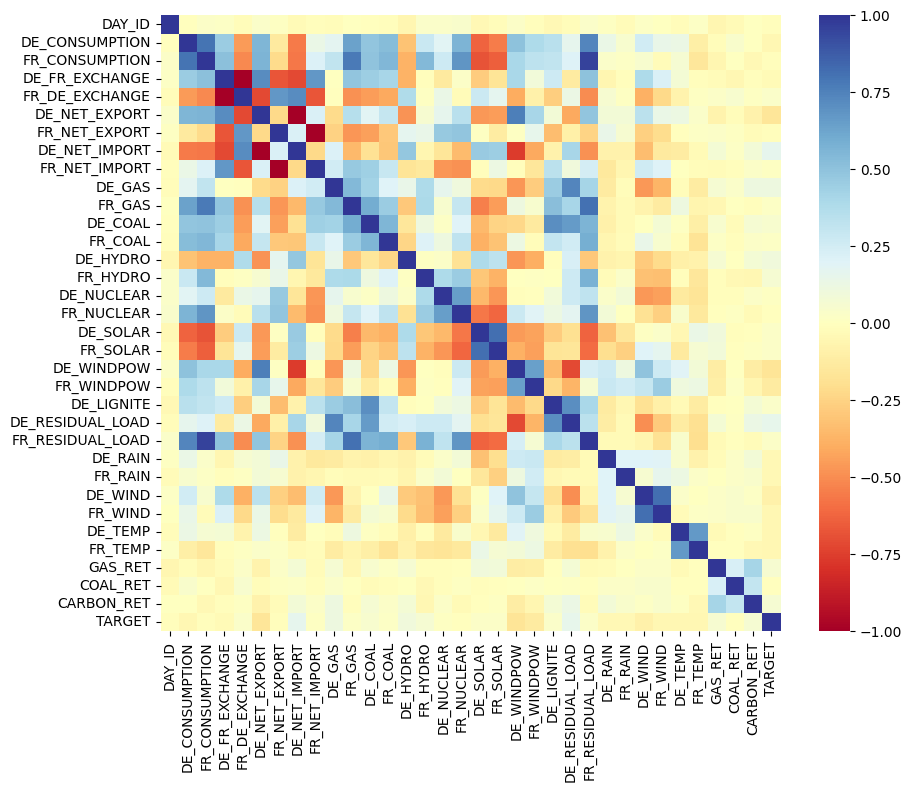

In [10]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(temp_data_xy.corr(), cmap="RdYlBu")

In [11]:
N = 20

abs_corr = temp_data_xy.corr().abs()
top_corr = abs_corr.unstack().sort_values(ascending=False).drop_duplicates()
top_corr = top_corr[top_corr != 1]
top_corr = top_corr.head(N)
print(top_corr)

FR_RESIDUAL_LOAD  FR_CONSUMPTION      0.960838
FR_WIND           DE_WIND             0.815138
FR_SOLAR          DE_SOLAR            0.813081
FR_RESIDUAL_LOAD  FR_GAS              0.808033
FR_CONSUMPTION    DE_CONSUMPTION      0.800025
FR_GAS            FR_CONSUMPTION      0.781048
DE_NET_EXPORT     DE_WINDPOW          0.761141
DE_GAS            DE_RESIDUAL_LOAD    0.739029
DE_CONSUMPTION    FR_RESIDUAL_LOAD    0.735505
DE_RESIDUAL_LOAD  DE_WINDPOW          0.715195
DE_NET_EXPORT     DE_FR_EXCHANGE      0.711708
DE_LIGNITE        DE_COAL             0.710016
                  DE_RESIDUAL_LOAD    0.705089
FR_NUCLEAR        FR_RESIDUAL_LOAD    0.686567
FR_CONSUMPTION    DE_SOLAR            0.684466
FR_NUCLEAR        FR_CONSUMPTION      0.680318
FR_DE_EXCHANGE    FR_NET_IMPORT       0.674350
DE_TEMP           FR_TEMP             0.665030
DE_COAL           DE_RESIDUAL_LOAD    0.658726
DE_NUCLEAR        FR_NUCLEAR          0.649448
dtype: float64


Après l'analyse multivariée, nous avons décicidé de supprimer les variables avec une corrélation suppérieur à 0.8. Ce choix est arbitraire, mais nous semble pertinant dans cette configuratiion de données. Nous supprimons donc les variables : FR_CONSUMPTION, DE_WIND, DE_SOLAR, FR_GAS, DE_CONSUMPTION. 

### Création de nouveaaux attributs

In [12]:
data_xy['FR_PROD_RENEWABLE'] = data_xy['FR_SOLAR'] + data_xy['FR_HYDRO'] + data_xy['FR_WINDPOW'] + data_xy['FR_NUCLEAR']
data_xy['DE_PROD_RENEWABLE'] = data_xy['DE_SOLAR'] + data_xy['DE_HYDRO'] + data_xy['DE_WINDPOW'] + data_xy['DE_NUCLEAR']

data_xy['DE_PROD_FOSIL'] = data_xy['DE_COAL'] + data_xy['DE_GAS'] + data_xy['DE_LIGNITE']
data_xy['FR_PROD_FOSSIL'] = data_xy['FR_COAL'] + data_xy['FR_GAS']

data_xy['FR_CONS_RENEWABLE'] = data_xy['FR_CONSUMPTION'] - data_xy['FR_RESIDUAL_LOAD']
data_xy['DE_CONS_RENEWABLE'] = data_xy['DE_CONSUMPTION'] - data_xy['DE_RESIDUAL_LOAD']

data_xy['FR_TOTAL_PROD'] = data_xy['FR_GAS'] + data_xy['FR_COAL'] + data_xy['FR_HYDRO'] + data_xy['FR_NUCLEAR'] \
                            + data_xy['FR_SOLAR'] + data_xy['FR_WINDPOW']

data_xy['DE_TOTAL_PROD'] = data_xy['DE_GAS'] + data_xy['DE_COAL'] + data_xy['DE_HYDRO'] + data_xy['DE_NUCLEAR'] \
                            + data_xy['DE_SOLAR'] + data_xy['DE_WINDPOW'] + data_xy['DE_LIGNITE']

### Suppression des attributs corrélés

In [13]:
data_xy = data_xy.drop(columns=['FR_CONSUMPTION','DE_WIND','DE_SOLAR','FR_GAS','DE_CONSUMPTION'])


### Suppression des attributs à distribution non Gaussienne

In [14]:
data_xy = data_xy.drop(columns=['FR_COAL','DE_NUCLEAR'])

### Sérpation des données : France/Allemagne

In [15]:
data_de = data_xy[data_xy['COUNTRY'] == 'DE'].drop(columns=['COUNTRY', 'DAY_ID'])
data_de.shape

(596, 34)

In [16]:
data_fr = data_xy[data_xy['COUNTRY'] == 'FR'].drop(columns=['COUNTRY', 'DAY_ID'])
data_fr.shape

(680, 34)

Nous constatons que le nombre de variables finales correspond à celui attendu, ce qui indique que les modifications apportées aux variables ont été correctement implémentées.

In [ ]:
data_de.to_csv("data/Data_DE.csv", index=True)
data_fr.to_csv("data/Data_FR.csv", index=True)

Nous stoquons les data frames modifiées afin de les récupérer pour la modélisation.